In [17]:
#First import all the libraries needed

import numpy as np #for linear algebra
import pandas as pd #for chopping, processing
import csv #for opening csv files
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting the graphs
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.pipeline import Pipeline #to assemble steps for cross validation
from sklearn.preprocessing import PolynomialFeatures #for all the polynomial features
from sklearn import svm #for Support Vector Machines
from sklearn.neighbors import NearestNeighbors #for nearest neighbor classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
from sklearn.naive_bayes import GaussianNB  #for naive bayes classifier
from scipy import stats #for statistical info

In [18]:
from sklearn.model_selection import train_test_split # to split the data in train and test
from sklearn.model_selection import KFold # for cross validation
from sklearn.grid_search import GridSearchCV  # for tuning parameters
from sklearn.neighbors import KNeighborsClassifier  #for k-neighbor classifier
from sklearn import metrics  # for checking the accuracy 
from time import time

In [19]:
#load data
data = pd.read_csv("data.csv")

In [20]:
data.shape

(569, 32)

In [21]:
#Description of the dataset

#how many cases are included in the dataset
length = len(data)
#how many features are in the dataset
features = data.shape[1]-1

# Number of malignant cases
malignant = len(data[data['diagnosis']=='M'])

#Number of benign cases
benign = len(data[data['diagnosis']=='B'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print "There are "+ str(len(data))+" cases in this dataset"
print "There are {}".format(features)+" features in this dataset"
print "There are {}".format(malignant)+" cases diagnosed as malignant tumor"
print "There are {}".format(benign)+" cases diagnosed as benign tumor"
print "The percentage of malignant cases is: {:.4f}%".format(rate)

There are 569 cases in this dataset
There are 31 features in this dataset
There are 212 cases diagnosed as malignant tumor
There are 357 cases diagnosed as benign tumor
The percentage of malignant cases is: 37.2583%


In [22]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [23]:
#make diagnosis column numerical
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [24]:
#drop ID because we do not need the ID number as shown above

data.drop('id',axis=1,inplace=True)
#check that dropped
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [25]:
#radius mean is the mean of distances from center to points on the perimeter of breast mass
#so let's look at maximum, minimum, average, and standard deviation of radius mean
min_radius = min(data['radius_mean'])
max_radius = max(data['radius_mean'])
average_radius = np.mean(data['radius_mean'])
sd_radius = np.std(data['radius_mean'])

print "Minimum of radius mean is: {:,.2f} ".format(min_radius)
print "Maximum of radius mean is: {:,.2f} ".format(max_radius)
print "Average of radius mean is: {:,.2f} ".format(average_radius)+"with a standard deviation of {:,.2f}".format(sd_radius)


Minimum of radius mean is: 6.98 
Maximum of radius mean is: 28.11 
Average of radius mean is: 14.13 with a standard deviation of 3.52


In [26]:
# Extract feature columns
features = list(data.columns[1:30])

In [27]:
#checking to make sure that features include everything but the diagnosis
print features

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [28]:
#Our target is predicting the diagnosis in benign or malignant, so we need to extract this one
target = data.columns[0:1]

In [29]:
#make sure this was done right
print target

Index([u'diagnosis'], dtype='object')


In [30]:
#Now we need to separate the data into feature data and target data
X = data[features] #our features that we will use to predict Y
Y = data[target] #our dependent variable, the one we are trying to predict from X

In [31]:

# Show the feature information by printing the first two rows
print "\nFeature values:"
print X.head(2)


Feature values:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   fractal_dimension_mean       ...        fractal_dimension_se  radius_worst  \
0                 0.07871       ...                    0.006193         25.38   
1                 0.05667       ...                    0.003532         24.99   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33            184.6      2019.0            0.1622   
1          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  
0   

In [32]:

# We have 569 cases in our set. Maybe we split the dataset into 400 training set and 169 testing
train = 400

test = X.shape[0] - train

# Shuffling and splitting the dataset into the number of training and testing points above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test, random_state=40)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 400 samples.
Testing set has 169 samples.


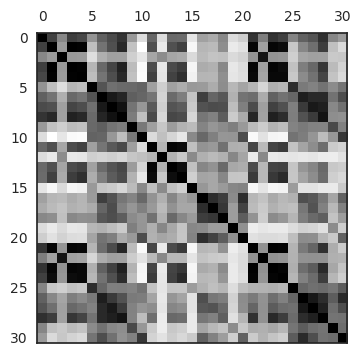

In [33]:
plt.matshow(data.corr())

In [34]:
def plot_corr(data,size=30):
    
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

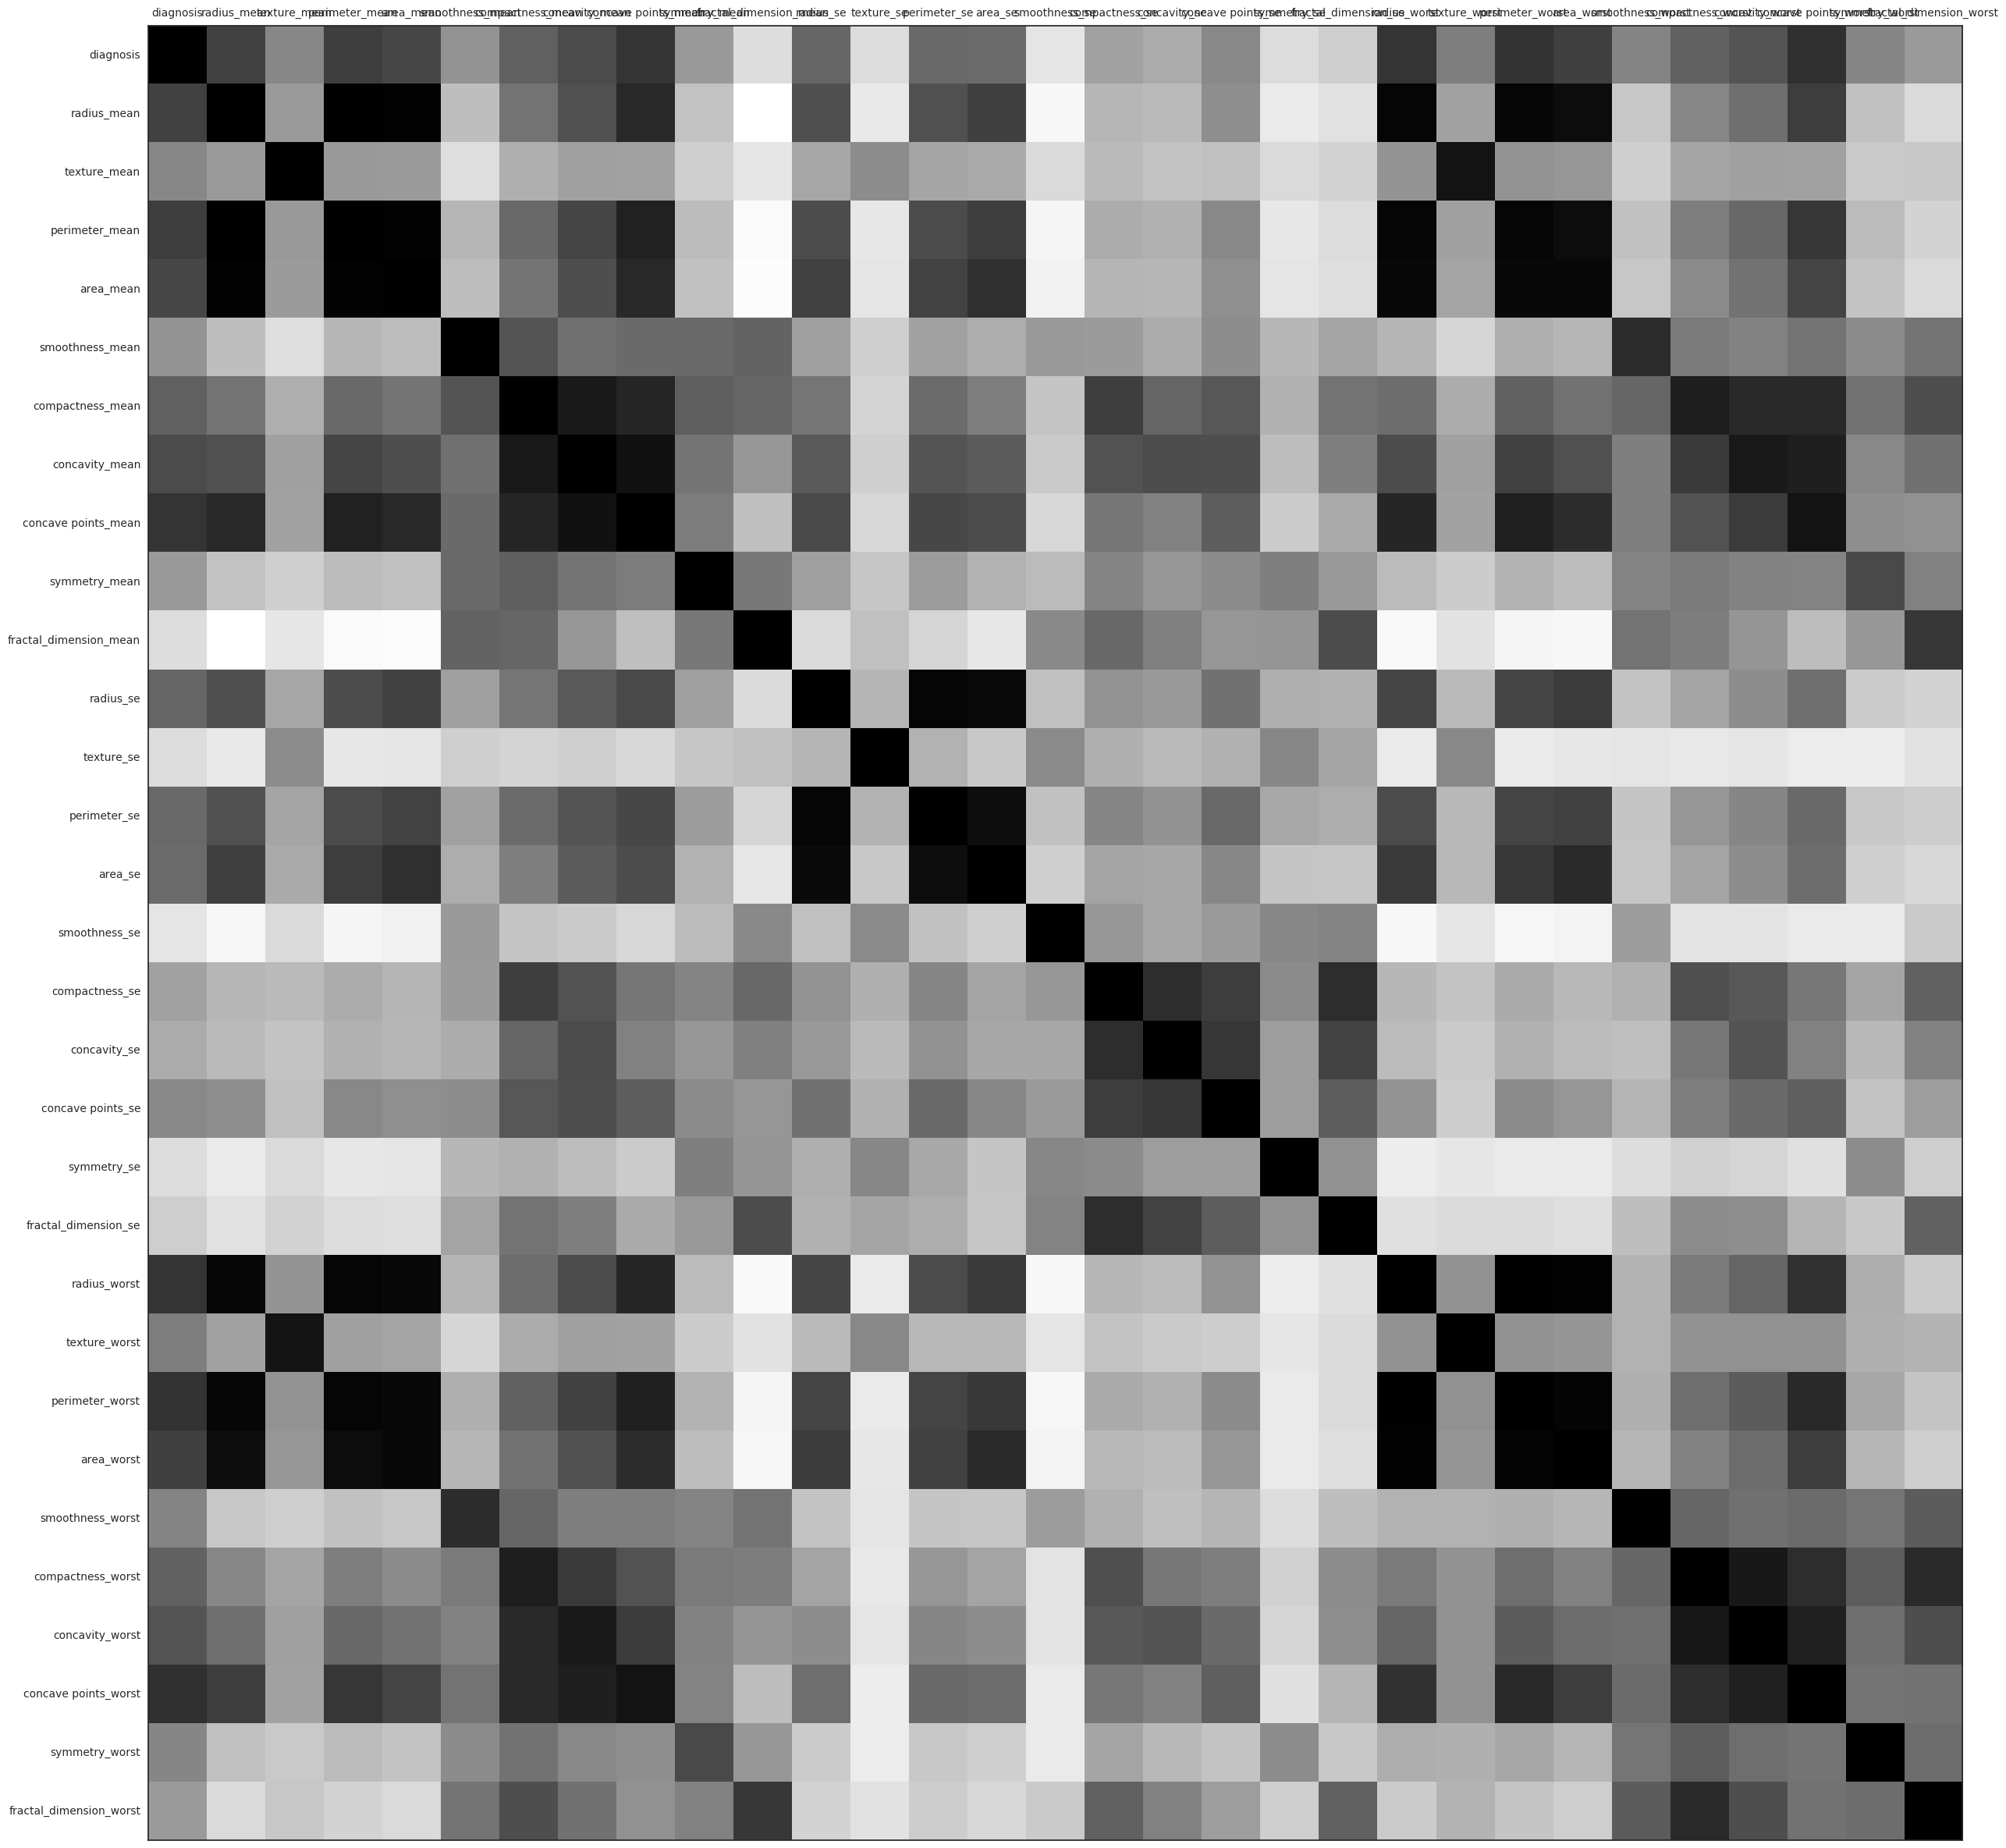

In [35]:
plot_corr(data, size=30)

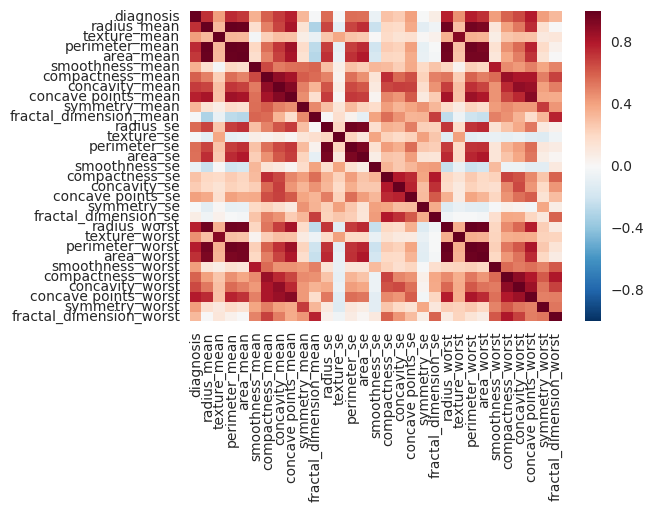

In [36]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

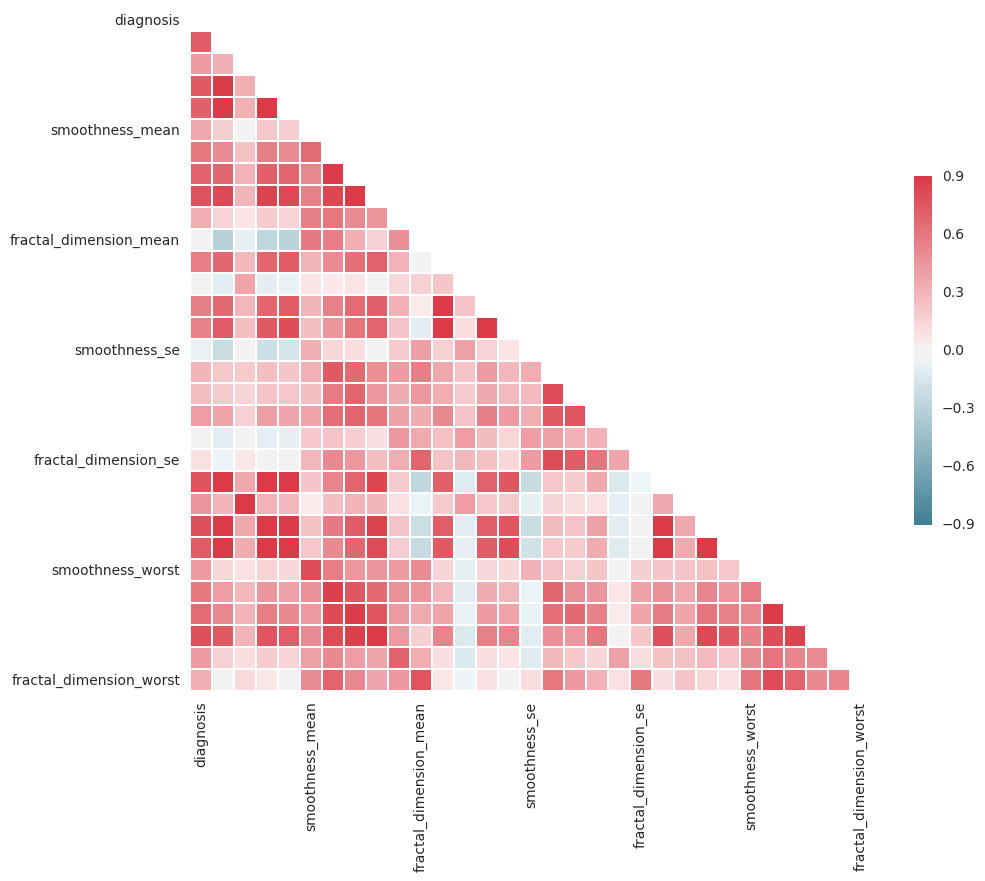

In [37]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'rate', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


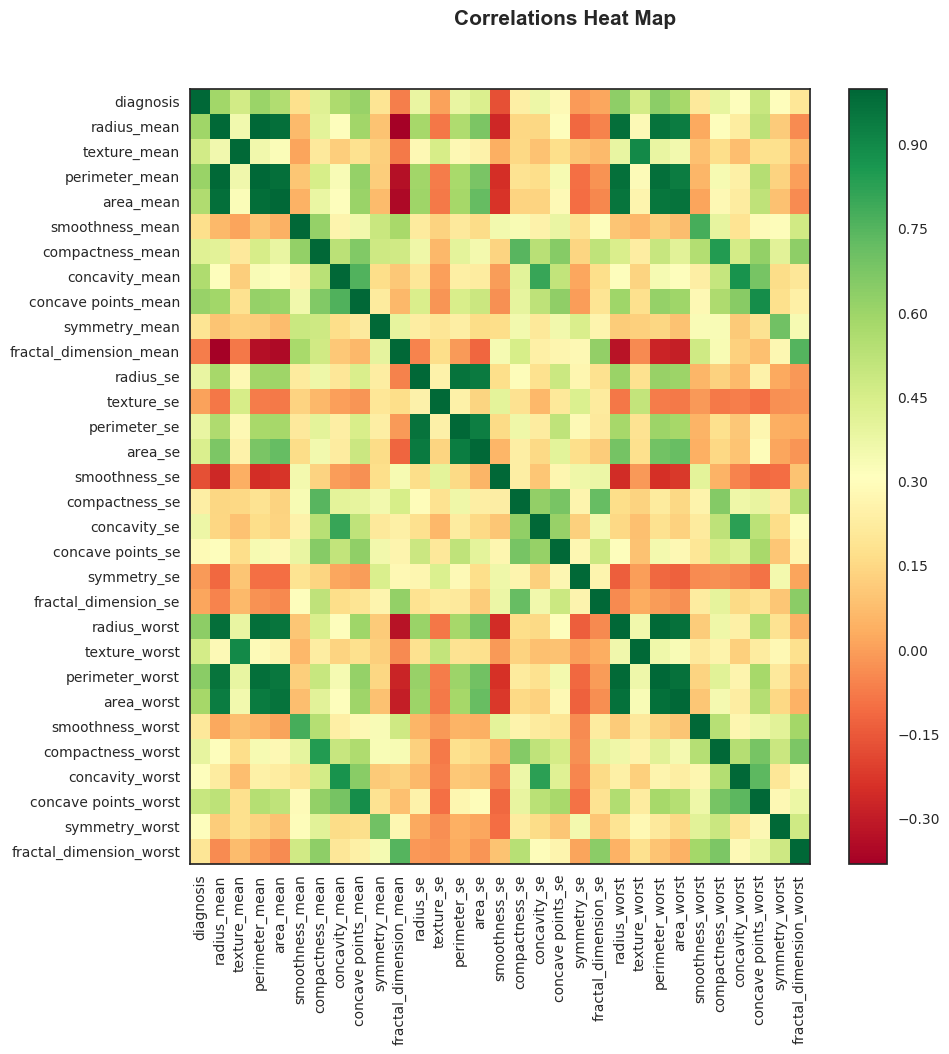

In [38]:
#Compute Percentage Change
rets = data.pct_change()

#Compute Correlation
corr = rets.corr()

#Plot Correlation Matrix using Matplotlib
%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()

In [39]:
#correlations and showing the highest ones
df = pd.DataFrame(X)
c = df.corr().abs()
s = c.unstack()
so = s.order(kind="quicksort")
print so

fractal_dimension_mean  radius_se                 0.000111
radius_se               fractal_dimension_mean    0.000111
fractal_dimension_se    perimeter_worst           0.001000
perimeter_worst         fractal_dimension_se      0.001000
fractal_dimension_se    texture_worst             0.003195
texture_worst           fractal_dimension_se      0.003195
fractal_dimension_se    perimeter_mean            0.005523
perimeter_mean          fractal_dimension_se      0.005523
texture_mean            smoothness_se             0.006614
smoothness_se           texture_mean              0.006614
symmetry_se             texture_mean              0.009127
texture_mean            symmetry_se               0.009127
smoothness_worst        symmetry_se               0.012662
symmetry_se             smoothness_worst          0.012662
fractal_dimension_se    area_mean                 0.019887
area_mean               fractal_dimension_se      0.019887
texture_se              concave points_mean       0.0214

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


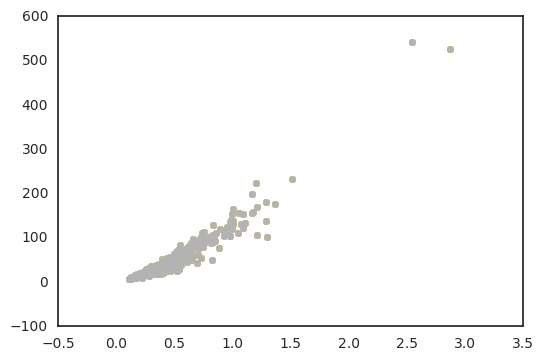

In [40]:
import brewer2mpl
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors
fig, ax = plt.subplots(1)
for i in range(8):
    x=df['radius_se']
    y=df['area_se']
    color = set2[i]
    ax.scatter(x,y, label=str(i), color=color)
#ax.legend()
fig.savefig('scatter_colors.png')